## Data explore

In [2]:
import pandas as pd
import numpy as np
import movingpandas as mdp


/usr/local/python/3.12.1/lib/python3.12/site-packages/movingpandas/__init__.py:37: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)


In [3]:
raw = pd.read_csv('../data/1.csv')
raw = raw.rename(columns={'对地航速（sog）': 'SOG', '航迹向（hdg）': 'heading', '前一个航迹向（pre_hdg）': 'preheading'})
raw.head(10)

,postime,time_diff,lon,lat,distance,SOG,heading,preheading,draught,pre_draught,status,pre_status,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction,装载状态
0,2020-12-31 16:01:40+00:00,720,101.28917,2.925650,0.0,0.0,30.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2020-12-31 16:04:40+00:00,180,101.28918,2.925655,0.0,0.0,30.0,30.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2020-12-31 16:16:40+00:00,720,101.28916,2.925652,0.0,0.0,29.0,30.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-12-31 16:19:40+00:00,180,101.28916,2.925655,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-12-31 16:28:40+00:00,540,101.28914,2.925659,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-12-31 16:40:52+00:00,732,101.28916,2.925633,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-12-31 16:46:40+00:00,348,101.28918,2.925643,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-12-31 16:58:40+00:00,720,101.28916,2.925640,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,2020-12-31 17:03:40+00:00,300,101.28916,2.925650,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,2020-12-31 17:16:40+00:00,780,101.28916,2.925615,0.0,0.0,30.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Axes: >

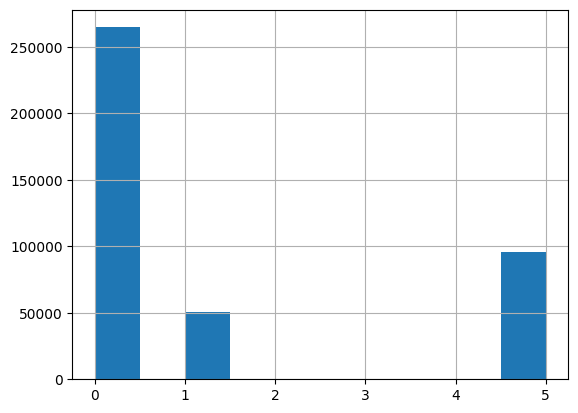

In [4]:
# 经检查，状态0是航行状态，状态1速度较低，状态5速度基本上都是0
raw.status.hist()

<Axes: >

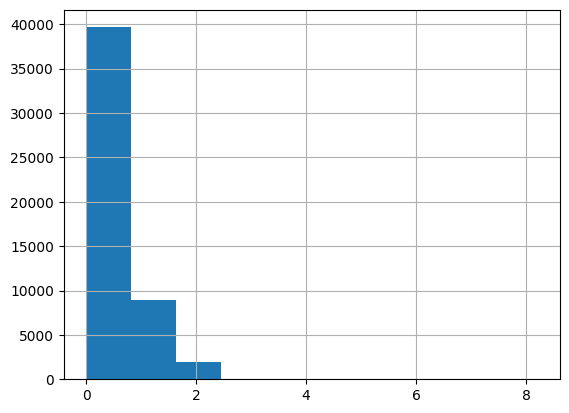

In [5]:
# 状态0的速度分布，训练数据以状态0和1为主
raw[raw.status==1].SOG.hist()

In [ ]:
# 将航行状态0和1数据全部提取
df = raw[(raw['status']==0) | (raw['status']==1)]

# 删除没有用的列
df.drop(['time_diff', 'lon', 'lat', 'distance', 'pre_status', '装载状态', 'pre_draught', 'preheading'], axis=1)

# 

,postime,SOG,heading,draught,status,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction
73,2021-01-01 01:25:40+00:00,0.7,31.0,13.9,1,2.41,34.0,0.07,280.0,0.09,356.0
74,2021-01-01 01:30:35+00:00,0.7,0.0,13.9,1,2.41,34.0,0.07,280.0,0.09,356.0
75,2021-01-01 01:42:35+00:00,9.0,220.0,13.9,0,2.41,34.0,0.07,280.0,0.09,356.0
76,2021-01-01 01:45:45+00:00,12.1,225.0,13.9,0,2.41,34.0,0.07,280.0,0.09,356.0
77,2021-01-01 01:53:01+00:00,13.2,191.0,13.9,0,2.41,34.0,0.07,280.0,0.09,356.0
...,...,...,...,...,...,...,...,...,...,...,...
410572,2024-12-04 22:31:16+00:00,1.6,338.0,10.8,0,0.00,0.0,0.00,0.0,0.00,0.0
410573,2024-12-04 22:33:55+00:00,1.0,340.0,10.8,0,0.00,0.0,0.00,0.0,0.00,0.0
410574,2024-12-04 22:36:24+00:00,0.3,343.0,10.8,0,0.00,0.0,0.00,0.0,0.00,0.0
410575,2024-12-04 22:39:35+00:00,0.0,343.0,10.8,0,0.00,0.0,0.00,0.0,0.00,0.0
